In [1]:
import cv2
import numpy as np
from time import gmtime, strftime
import tensorflow as tf
from tensorflow.keras.models import model_from_json

# 读取模型架构
json_file = open('./modelcc.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.summary()
tf.keras.utils.plot_model(model,to_file='./modelqz.png')
# 读取模型权重
model.load_weights("./modelqz.h5")
# 设定损失函数、优化、参考参数
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [3]:
cap = cv2.VideoCapture(0)
while(True):
    ret, img = cap.read()
    if ret==True:
        cv2.imshow('img', img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imshow('gray', gray)
        resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
        cv2.imshow('resized', resized)
        (thresh, blackAndWhiteImage) = cv2.threshold(resized, 140, 255, cv2.THRESH_BINARY)
        cv2.imshow('blackAndWhiteImage', blackAndWhiteImage)
        inverte = cv2.bitwise_not(blackAndWhiteImage)
        cv2.imshow('inverte', inverte)
    key=cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        break
    elif key & 0xFF == ord('s'):
        if ret == True:
            cv2.imwrite('.//1.jpg',img=img)
    elif key & 0xFF == ord('c'):
        b = inverte.astype(dtype=np.float32)
        x_test = b.reshape(1, 28, 28, 1)
        x_test /= 255
        predict2 = model.predict_classes(x_test)
        print("predict_classes:", predict2)
cap.release()
cv2.destroyAllWindows()

#识别出来的数字对应test集中的图片序号

predict_classes: [4]


In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

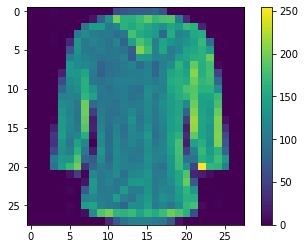

In [8]:
plt.figure()
plt.imshow(x_test[4])
plt.colorbar()
plt.grid(False)
plt.show()